<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/%F0%9F%91%91King_Kohli_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

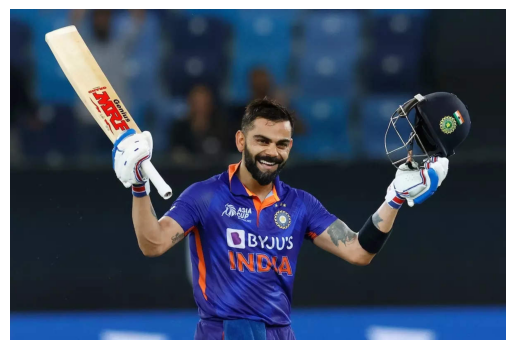

In [159]:
image_path = '/content/2-.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  #Turn off axis ticks and labels
plt.show()

In [160]:
df = pd.read_csv('71 Centuries of Virat Kohli.csv')

In [161]:
df.head()

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Venue,Column1,H/A,Date,Result,Format,Man of the Match,Captain,Unnamed: 14
0,116,Out,Australia,6,2,NaN,Adelaide Oval,Adelaide,Away,24-01-2012,Lost,Test,No,No,NaN
1,103,Out,New Zealand,5,2,NaN,M. Chinnaswamy Stadium,Bangalore,Home,31-08-2012,Won,Test,Yes,No,NaN
2,103,Out,England,5,2,NaN,Vidarbha Cricket Association Stadium,Nagpur,Home,13-12-2012,Drawn,Test,No,No,NaN
3,107,Out,Australia,5,2,NaN,M. A. Chidambaram Stadium,Chennai,Home,22-02-2013,Won,Test,No,No,NaN
4,119,Out,South Africa,4,1,NaN,Wanderers Stadium,Johannesburg,Away,18-12-2013,Drawn,Test,No,No,NaN


In [162]:
df.describe()

,Score,Batting Order,Inn.,Strike Rate,Unnamed: 14
count,71.000000,71.000000,71.000000,44.000000,0.0
mean,132.140845,3.521127,1.732394,114.019545,NaN
std,35.911119,0.714326,0.675230,25.257567,NaN
min,100.000000,1.000000,1.000000,84.900000,NaN
25%,107.000000,3.000000,1.000000,96.632500,NaN
50%,119.000000,3.000000,2.000000,108.935000,NaN
75%,139.500000,4.000000,2.000000,120.787500,NaN
max,254.000000,6.000000,4.000000,200.000000,NaN


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Score             71 non-null     int64  
 1   Out/Not Out       71 non-null     object 
 2   Against           71 non-null     object 
 3   Batting Order     71 non-null     int64  
 4   Inn.              71 non-null     int64  
 5   Strike Rate       44 non-null     float64
 6   Venue             71 non-null     object 
 7   Column1           71 non-null     object 
 8   H/A               71 non-null     object 
 9   Date              71 non-null     object 
 10  Result            71 non-null     object 
 11  Format            71 non-null     object 
 12  Man of the Match  71 non-null     object 
 13  Captain           71 non-null     object 
 14  Unnamed: 14       0 non-null      float64
dtypes: float64(2), int64(3), object(10)
memory usage: 8.4+ KB


In [164]:
df = df.drop('Unnamed: 14' , axis = 1)

Text(0.5, 1.0, 'Virat against teams')

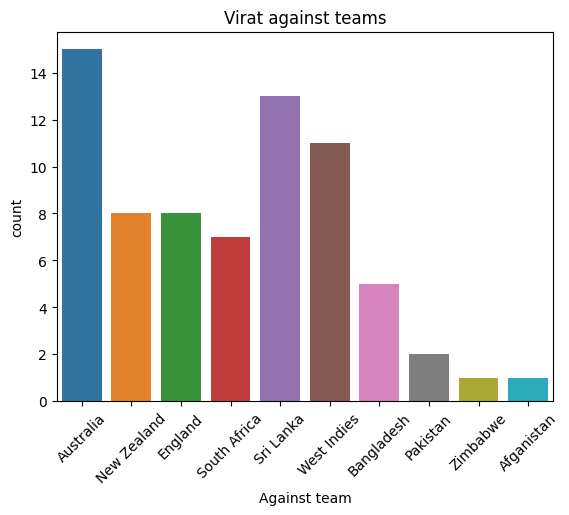

In [165]:
sns.countplot(x = df['Against'])
plt.xticks(rotation = 45)
plt.xlabel('Against team')
plt.title('Virat against teams')

<Axes: xlabel='Batting Order', ylabel='count'>

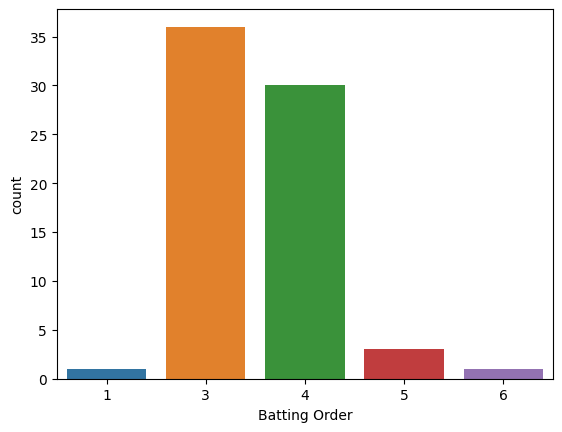

In [166]:
sns.countplot(x = df['Batting Order'])

<Axes: xlabel='Batting Order', ylabel='count'>

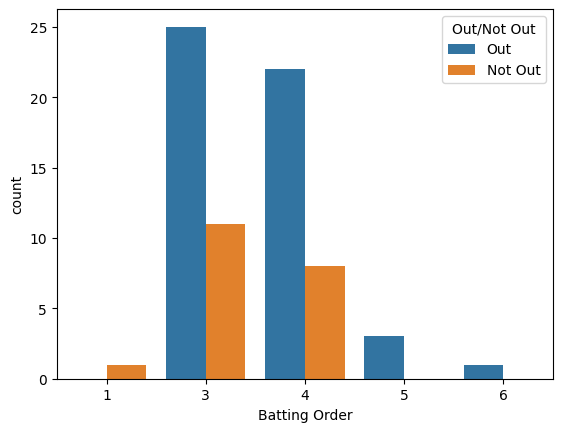

In [167]:
sns.countplot(x = df['Batting Order'], hue = df['Out/Not Out'])

<Axes: xlabel='Inn.', ylabel='count'>

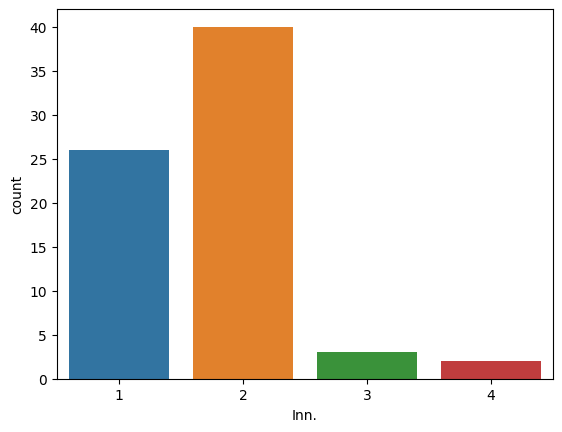

In [168]:
sns.countplot(x = df['Inn.'])

<Axes: xlabel='Batting Order', ylabel='count'>

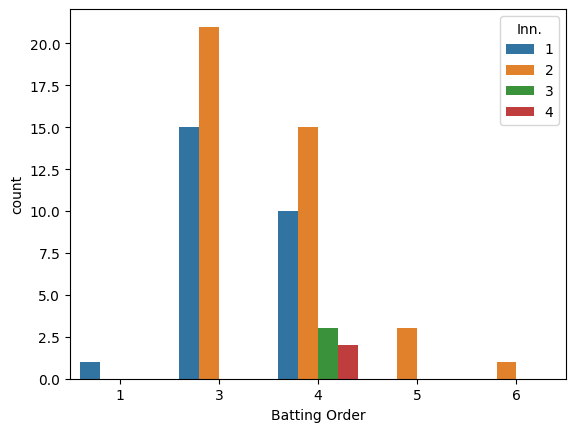

In [169]:
sns.countplot(x = df['Batting Order'], hue = df['Inn.'])

<Axes: >

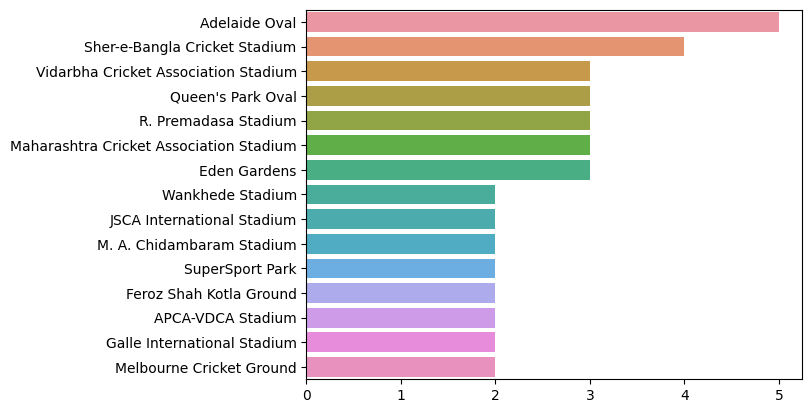

In [170]:
Top_venue = df['Venue'].value_counts().head(15)
sns.barplot(x = Top_venue.values , y = Top_venue.index)

In [171]:
Top = df.groupby('H/A')['Venue'].value_counts()
Top

H/A   Venue                                       
Away  Adelaide Oval                                   5
      Sher-e-Bangla Cricket Stadium                   4
      Queen's Park Oval                               3
      R. Premadasa Stadium                            3
      Galle International Stadium                     2
      Melbourne Cricket Ground                        2
      SuperSport Park                                 2
      Basin Reserve                                   1
      Bellerive Oval                                  1
      Dubai International Cricket Stadium             1
      Edgbaston Cricket Ground                        1
      Harare Sports Club                              1
      Khan Shaheb Osman Ali Stadium                   1
      Kingsmead Cricket Ground                        1
      MRIC Stadium                                    1
      Manuka Oval                                     1
      McLean Park                                    

Text(0.5, 1.0, 'Venue Counts by Type')

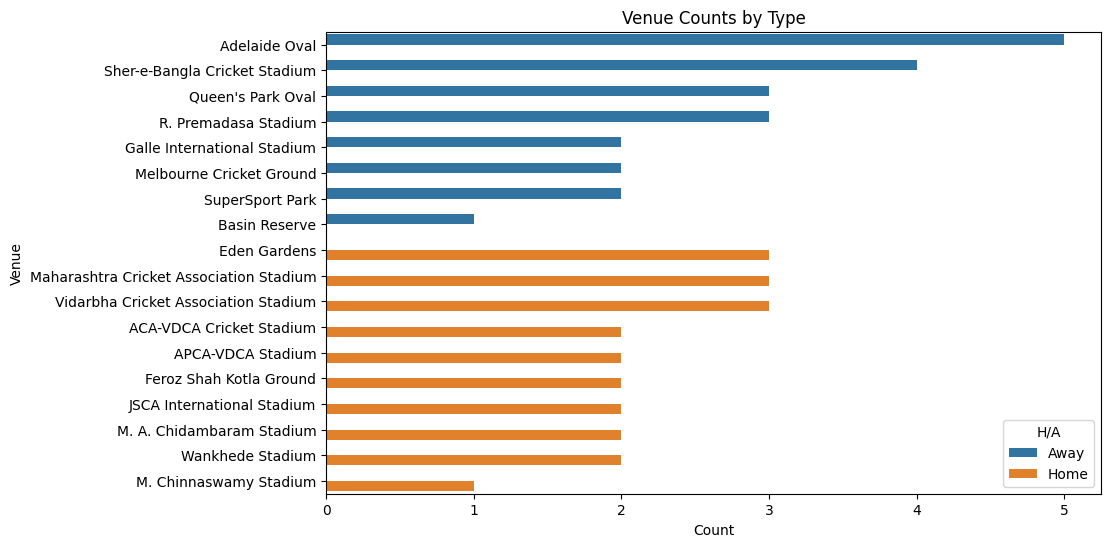

In [172]:
venue_data = {
    ('Away' ,'Adelaide Oval') : 5,
    ('Away' ,'Sher-e-Bangla Cricket Stadium'): 4,
    ('Away' ,'Queen\'s Park Oval'): 3,
    ('Away' ,'R. Premadasa Stadium'): 3,
    ('Away' ,'Galle International Stadium'): 2,
    ('Away' ,'Melbourne Cricket Ground'): 2,
    ('Away' ,'SuperSport Park'): 2,
    ('Away' ,'Basin Reserve'): 1,
    ('Home' ,'Eden Gardens'): 3,
    ('Home' ,'Maharashtra Cricket Association Stadium'): 3,
    ('Home' ,'Vidarbha Cricket Association Stadium'): 3,
    ('Home' ,'ACA-VDCA Cricket Stadium'): 2,
    ('Home' ,'APCA-VDCA Stadium'): 2,
    ('Home' ,'Feroz Shah Kotla Ground'): 2,
    ('Home' ,'JSCA International Stadium'): 2,
    ('Home' ,'M. A. Chidambaram Stadium'): 2,
    ('Home' ,'Wankhede Stadium'): 2,
    ('Home' ,'M. Chinnaswamy Stadium'): 1
}
df_venue = pd.DataFrame(list(venue_data.values()), index=pd.MultiIndex.from_tuples(venue_data.keys(), names=['H/A', 'Venue']), columns=['Count'])
df_venue = df_venue.reset_index()
plt.figure(figsize = (10,6))
sns.barplot(x='Count', y='Venue', hue='H/A', data=df_venue)
plt.xlabel('Count')
plt.ylabel('Venue')
plt.title('Venue Counts by Type')

df_venue.reset_index() is called to reset the index of the df_venue DataFrame. This is done to convert the current index, which consists of a MultiIndex composed of the 'H/A' and 'Venue' columns, into regular columns in the DataFrame.

Text(0.5, 1.0, 'Virat Out/not-out against teams')

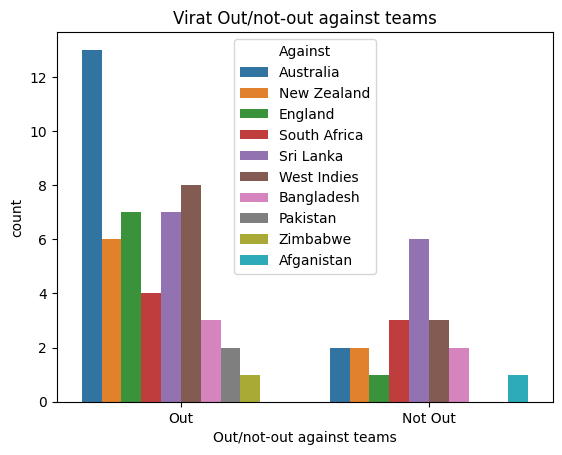

In [173]:
sns.countplot(x = df['Out/Not Out'],hue = df['Against'])
plt.xlabel('Out/not-out against teams')
plt.title('Virat Out/not-out against teams')

Text(0.5, 1.0, 'Virat Out/not-out against teams')

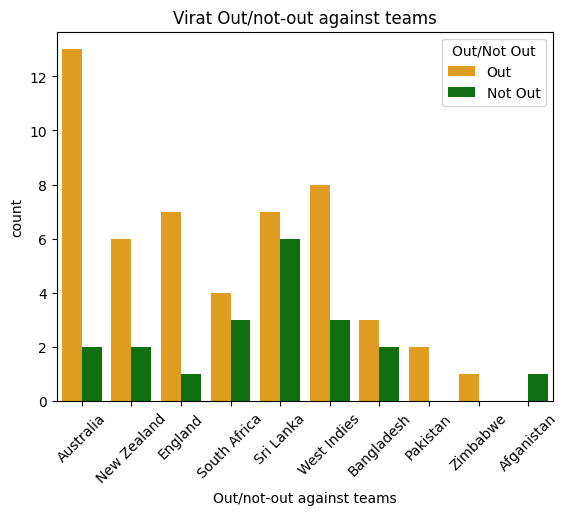

In [174]:
sns.countplot(x = df['Against'],hue = df['Out/Not Out'],palette = ['orange', 'green'])
plt.xticks(rotation = 45)
plt.xlabel('Out/not-out against teams')
plt.title('Virat Out/not-out against teams')

In [175]:
Run_against = df.groupby('Against')['Score'].sum()
Run_against = Run_against.sort_values(ascending = True)
Run_against

Against
Zimbabwe         115
Afganistan       122
Pakistan         290
Bangladesh       678
New Zealand     1035
South Africa    1065
England         1098
West Indies     1434
Sri Lanka       1728
Australia       1817
Name: Score, dtype: int64

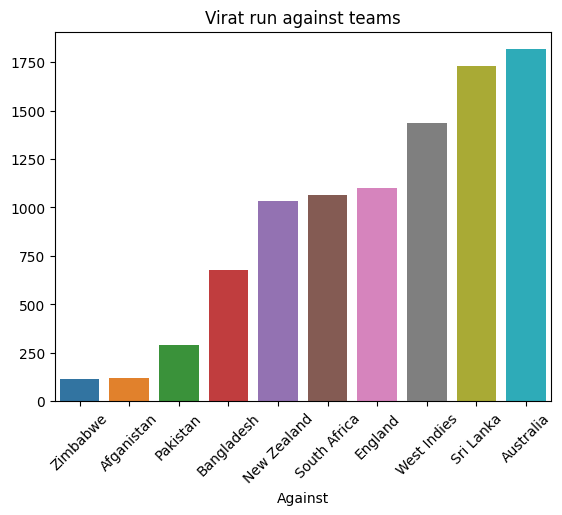

In [192]:
sns.barplot(x = Run_against.index , y = Run_against.values)
plt.xticks(rotation = 45)
plt.title('Virat run against teams')
plt.show()

In [177]:
'''Hundreds_against = df.groupby('Against').apply(lambda x: x[x['Score'] > 100])
Hundreds_against = Hundreds_against.reset_index(drop=True)
Hundreds_against'''

"Hundreds_against = df.groupby('Against').apply(lambda x: x[x['Score'] > 100])\nHundreds_against = Hundreds_against.reset_index(drop=True)\nHundreds_against"

In [178]:
'''sns.countplot(x = 'Against' , data = Hundreds_against)
plt.xticks(rotation = 45)'''

"sns.countplot(x = 'Against' , data = Hundreds_against)\nplt.xticks(rotation = 45)"

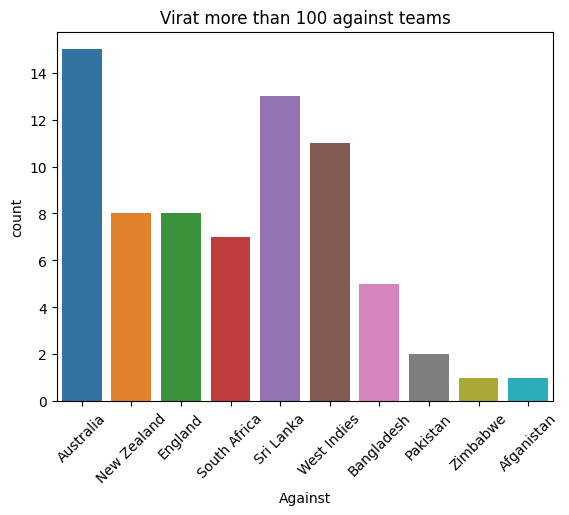

In [193]:
hundreds = df[df['Score'] >= 100]
sns.countplot(x='Against', data=hundreds)
plt.xticks(rotation = 45)
plt.title('Virat more than 100 against teams')
plt.show()

Text(0.5, 1.0, 'No of times tem won when he scored more than hundred')

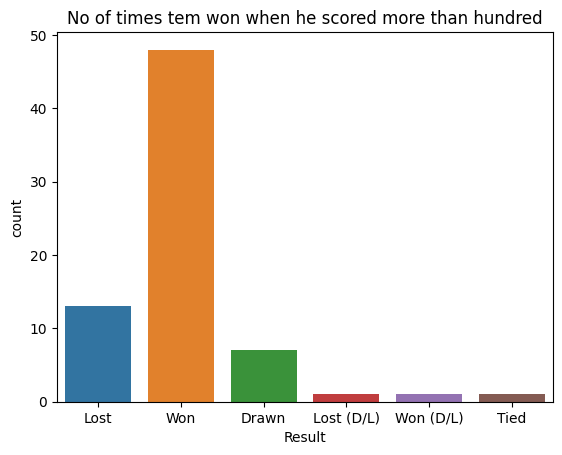

In [195]:
sns.countplot(x = df['Result'])
plt.title('No of times tem won when he scored more than hundred')

<Axes: xlabel='Format', ylabel='count'>

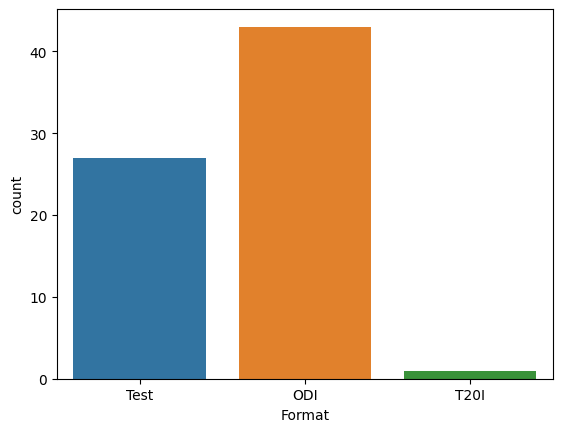

In [181]:
sns.countplot(x = df['Format'])

<Axes: xlabel='Format', ylabel='count'>

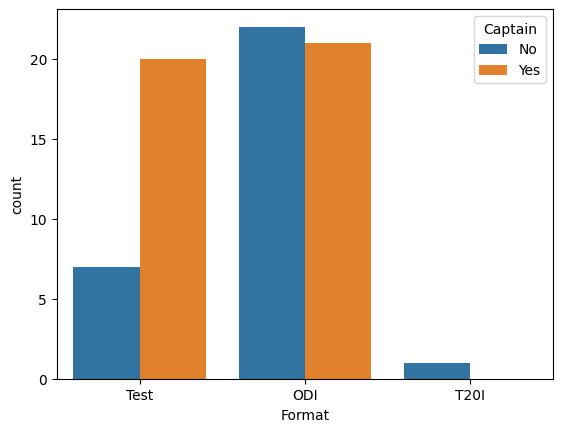

In [182]:
sns.countplot(x = df['Format'] , hue = df['Captain'])

<Axes: xlabel='Man of the Match', ylabel='count'>

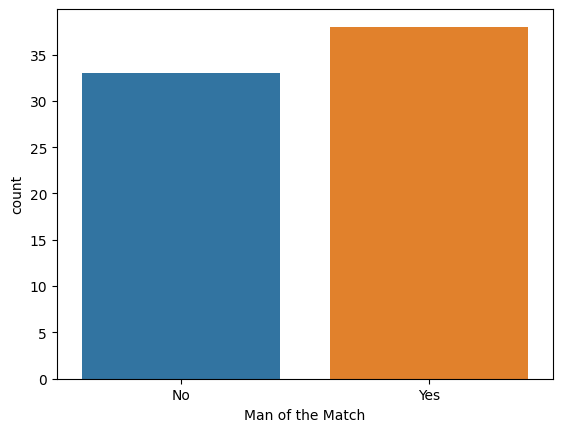

In [183]:
sns.countplot(x = df['Man of the Match'])

<Axes: xlabel='Man of the Match', ylabel='count'>

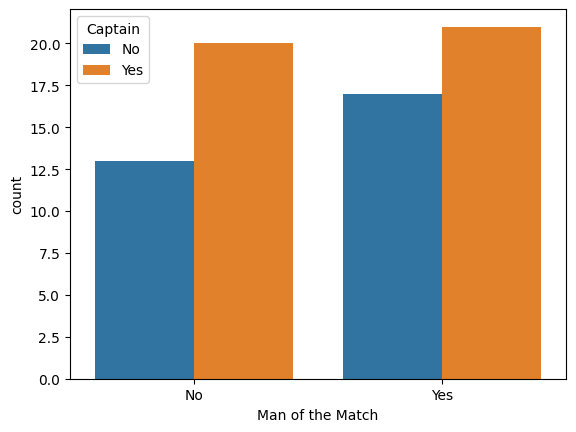

In [184]:
sns.countplot(x = df['Man of the Match'] , hue = df['Captain'])

<Axes: xlabel='Man of the Match', ylabel='count'>

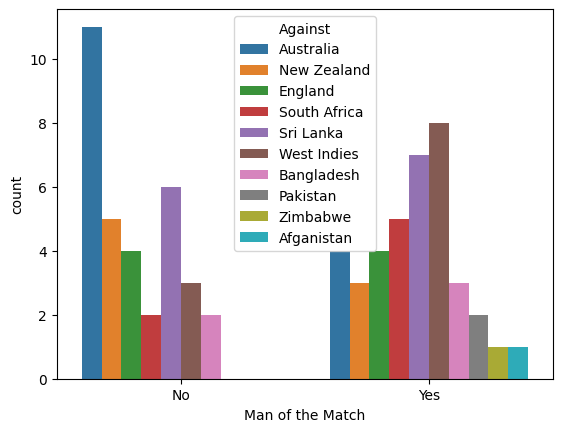

In [185]:
sns.countplot(x = df['Man of the Match'] , hue = df['Against'])

<Axes: xlabel='Captain', ylabel='count'>

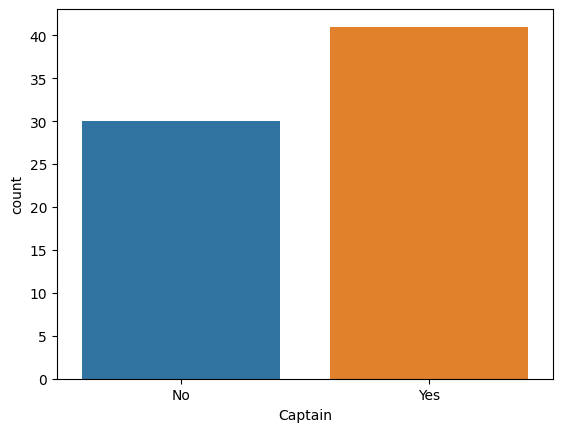

In [186]:
sns.countplot(x = df['Captain'])

In [187]:
table = df.pivot_table(index='Captain', columns='Out/Not Out', aggfunc='size', fill_value=0)
print(table)

Out/Not Out  Not Out  Out
Captain                  
No                10   20
Yes               10   31


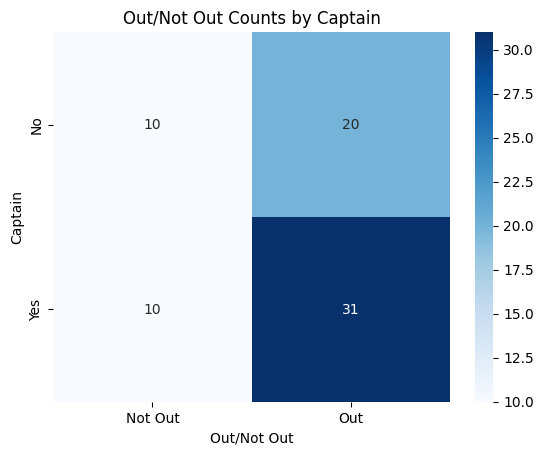

In [188]:
sns.heatmap(data=table, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Out/Not Out')
plt.ylabel('Captain')
plt.title('Out/Not Out Counts by Captain')
plt.show()

<ipython-input-189-2e3232471720>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


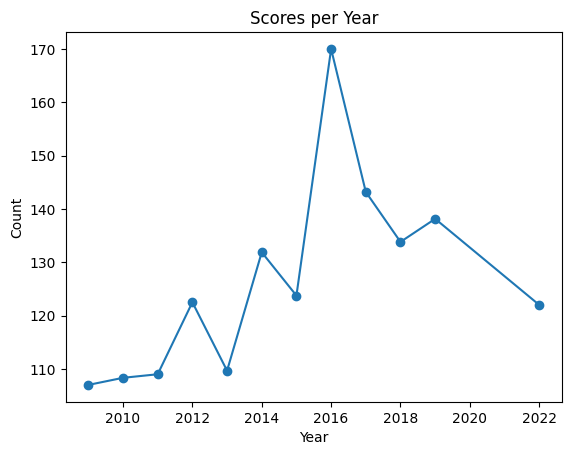

In [189]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
mean = df.groupby('Year')['Score'].mean()
plt.plot(mean.index, mean.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Scores per Year')
plt.show()

In [190]:
# Love you king kohli

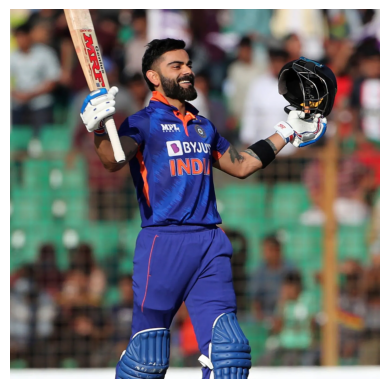

In [191]:
image_path = '/content/virat-kohli-celebrates-his-44th-odi-ton-ap-photo.webp'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  #Turn off axis ticks and labels
plt.show()